In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import scipy.interpolate as interp
import pandas as pd
from helpers import *
# ensure the notebook generate the same randomess
np.random.seed(1)

### Sprawdzenie

In [38]:
N = 2
R = [10**3,10**5, 10**7]

In [39]:
PoA = []
for r in R: 
    v = np.random.uniform(0,1,(r,N))
    alpha = np.random.uniform(0,10,(r,N))
    sorted_alpha = np.sort(alpha, axis=1)[:, ::-1]
    b =  bet_Bayes_Nash_second(N, v)

    sorted_b = np.sort(b, axis=1)[:, ::-1]
    winners_index=np.apply_along_axis(index_of_sorted_elements, axis = 1, arr = b)
    v_in_order = np.take_along_axis(v, winners_index, axis=1)
    Welf = np.sum(alpha * v_in_order, axis = 1)
    sorted_v = np.sort(v, axis=1)[:, ::-1]
    Opt = np.sum(alpha * sorted_v, axis = 1)
    PoA.append(np.mean(Welf/Opt))

pd.DataFrame({"R":R, 'PoA':PoA})

,R,PoA
0,1000,1.0
1,100000,1.0
2,10000000,1.0


In [40]:
N = 3
R = [10**3,10**5, 10**7]

In [41]:
PoA = []
for r in R: 
    v = np.random.uniform(0,1,(r,N))
    b = bet_Bayes_Nash_second(N, v)
    sorted_b = np.sort(b, axis=1)[:, ::-1]
    
    auctioneer_utility = [sum(bi) for bi in b]
    winner_index=np.argmax(b, axis=1)

    winner_utility = v[np.arange(r), winner_index] - np.partition(sorted_b, -2, axis=1)[:, -2]
    Welf = v[np.arange(r), winner_index]
    Opt =v.max(axis = 1)
    PoA.append(np.mean(Welf/Opt))

pd.DataFrame({"R":R, 'PoA':PoA})

,R,PoA
0,1000,1.0
1,100000,1.0
2,10000000,1.0


### Gdy oferty pochodzą z U(0,1)

In [42]:
n = 100
r = 10000

In [43]:
PoA_mean = []
PoA_min = []

for N in range(2,n): 
    v = np.random.uniform(0,1,(r,N))
    b = bet_random(v)
    sorted_b = np.sort(b, axis=1)[:, ::-1]
    
    auctioneer_utility = [sum(bi) for bi in b]
    winner_index=np.argmax(b, axis=1)
    winner_utility = v[np.arange(r), winner_index] - np.partition(sorted_b, -2, axis=1)[:, -2]
    Welf = v[np.arange(r), winner_index]
    Opt =v.max(axis = 1)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))

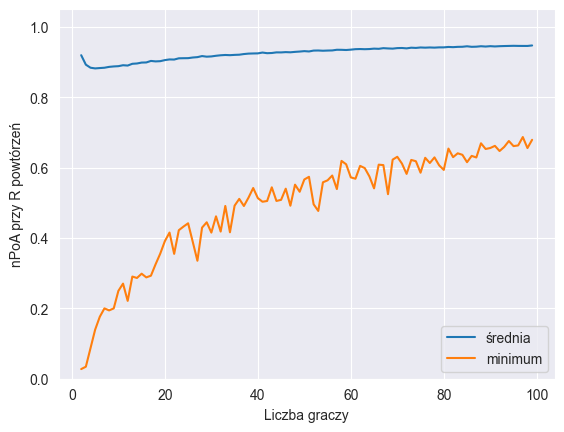

In [44]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.savefig('pictures/uniform/uniform_second_price.png')

### Gdy oferty pochodzą z normalnego z overbettingiem

In [45]:
PoA_mean = []
PoA_min = []

for N in range(2,n): 
    v = np.random.uniform(0,1,(r,N))
    b_mean = bet_Bayes_Nash_second(N, v)
    b_variance = produce_variance(b_mean, 1)
    b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
    
    sorted_b = np.sort(b, axis=1)[:, ::-1]
    auctioneer_utility = [sum(bi) for bi in b]
    winner_index=np.argmax(b, axis=1)
    winner_utility = v[np.arange(r), winner_index] - np.partition(sorted_b, -2, axis=1)[:, -2]
    Welf = v[np.arange(r), winner_index]
    Opt =v.max(axis = 1)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))

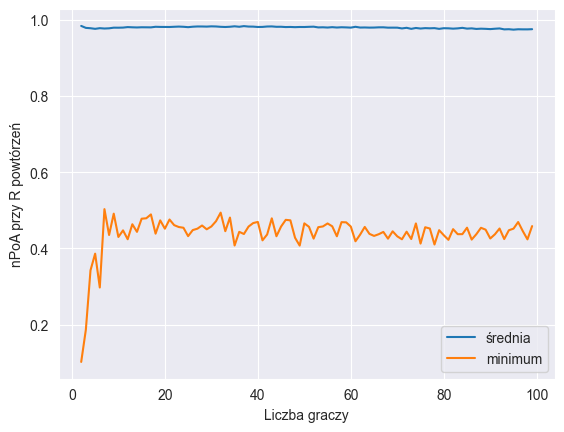

In [46]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='lower right')
#plt.ylim(0, 1.05)
plt.savefig('pictures/overbetting/normal_second_price.png')

### Gdy oferty pochodzą z normalnego bez oferbettingu

In [47]:
PoA_mean = []
PoA_min = []

for N in range(2,n): 
    v = np.random.uniform(0,1,(r,N))
    b_mean = bet_Bayes_Nash_second(N, v)
    b_variance = produce_variance(b_mean, v)
    b =  negative_to_zero(bet_normal(b_mean,b_variance), 1)
    
    sorted_b = np.sort(b, axis=1)[:, ::-1]
    auctioneer_utility = [sum(bi) for bi in b]
    winner_index=np.argmax(b, axis=1)
    winner_utility = v[np.arange(r), winner_index] - np.partition(sorted_b, -2, axis=1)[:, -2]
    Welf = v[np.arange(r), winner_index]
    Opt =v.max(axis = 1)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))

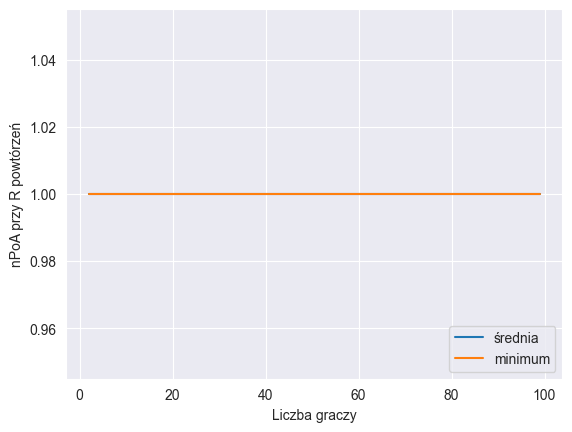

In [48]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='lower right')
#plt.ylim(0, 1.05)
plt.savefig('pictures/no_overbetting/normal_second_price')